In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from itertools import cycle
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)



This notebook is used to make the plots for Rosalind's presentation.  Firstly, a comparison between the effects of N* = 0.7 and 1.17, similar to the 
stochastic versions of fig 4c and 4d from the bftt paper

In [2]:
max_gRate = 0.083 #max growth rate of the bacteria
K = 1000 #carrying capacity for the regular simulations
big_K = 10000 #carring capacity for the big_K simulations
duration_fig4 = 100. #duration of the simulations used for the figure 4 plots

In [3]:
def readDeterministicData(filepath):
    '''
    method to read in Chris' deterministic data into pandas dataframe.
    Need to set delimiter to space, and also deal with the leading whitespace in the 1st column which produces a column of NaNs
    '''
    df = pd.read_csv(filepath, sep=" ", header=None, names=["blank", 't', 'N_edge', 'N'])
    df = df.drop(columns=['blank'])
    #truncate the data so that it's for the same duration as the stochastic ones
    return df[df['t'] < duration_fig4*max_gRate]

In [4]:
#both parameter sets use the same set of immigration rates
#the 4c sets are for N* = 1.17, 4d is N* = 0.7
r_imm = [0.4, 0.5, 0.6, 0.7]

#these are the ones used to make the second batch of plots for the paper, the corresponding colour map ones
#this is what some of the _v2 variables refer to
r_imm_v2 = [0.55, 0.6, 0.65]

#N* = 1.17
fig4c_rImm_0_4 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_4-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_5 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_5-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_55 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_55-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_6 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_6-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_65 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_65-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_7 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_7-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_pops = [fig4c_rImm_0_4, fig4c_rImm_0_5, fig4c_rImm_0_6, fig4c_rImm_0_7]
fig4c_pops_v2 = [fig4c_rImm_0_55, fig4c_rImm_0_6, fig4c_rImm_0_65] # this v2 is unrelated to the stochastic logistic death stuff

# smaller tau step
fig4c_rImm_0_55_small_tau = pd.read_csv("solo_results_bigK/ratios4c_rImmig_0_55-stochastic_pop_over_time-SMALL_TAU.csv") # tau 0.01
fig4c_rImm_0_55_smaller_tau = pd.read_csv("solo_results_bigK/ratios4c_rImmig_0_55-stochastic_pop_over_time-SMALLER_TAU.csv") # tau 0.001
fig4c_pops_varying_tau = [fig4c_rImm_0_55, fig4c_rImm_0_55_small_tau, fig4c_rImm_0_55_smaller_tau]
varying_tau_vals = [0.1, 0.01, 0.001]

#N* = 0.7
fig4d_rImm_0_4 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_4-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_5 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_5-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_55 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_55-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_6 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_6-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_65 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_65-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_7 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_7-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_pops = [fig4d_rImm_0_4, fig4d_rImm_0_5, fig4d_rImm_0_6, fig4d_rImm_0_7]
fig4d_pops_v2 = [fig4d_rImm_0_55, fig4d_rImm_0_6, fig4d_rImm_0_65] # this v2 is unrelated to the stochastic logistic death stuff

#N* = 0.9
fig4e_rImm_0_4 = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_4-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4e_rImm_0_5 = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_5-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4e_rImm_0_6 = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_6-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4e_rImm_0_7 = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_7-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4e_pops = [fig4e_rImm_0_4, fig4e_rImm_0_5, fig4e_rImm_0_6, fig4e_rImm_0_7]


#microhab times
fig4c_rImm_0_4_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_4-stochastic_microhabs_over_time.csv")
fig4c_rImm_0_5_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_5-stochastic_microhabs_over_time.csv")
fig4c_rImm_0_6_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_6-stochastic_microhabs_over_time.csv")
fig4c_rImm_0_7_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_7-stochastic_microhabs_over_time.csv")
fig4c_mh_times = [fig4c_rImm_0_4_mhTimes, fig4c_rImm_0_5_mhTimes, fig4c_rImm_0_6_mhTimes, fig4c_rImm_0_7_mhTimes]
for mh_t in fig4c_mh_times:
    mh_t['avg_mh_t'] = mh_t.mean(axis=1)

fig4d_rImm_0_4_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_4-stochastic_microhabs_over_time.csv")
fig4d_rImm_0_5_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_5-stochastic_microhabs_over_time.csv")
fig4d_rImm_0_6_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_6-stochastic_microhabs_over_time.csv")
fig4d_rImm_0_7_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_7-stochastic_microhabs_over_time.csv")
fig4d_mh_times = [fig4d_rImm_0_4_mhTimes, fig4d_rImm_0_5_mhTimes, fig4d_rImm_0_6_mhTimes, fig4d_rImm_0_7_mhTimes]
for mh_t in fig4d_mh_times:
    mh_t['avg_mh_t'] = mh_t.mean(axis=1)
    
fig4e_rImm_0_4_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_4-stochastic_microhabs_over_time.csv")
fig4e_rImm_0_5_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_5-stochastic_microhabs_over_time.csv")
fig4e_rImm_0_6_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_6-stochastic_microhabs_over_time.csv")
fig4e_rImm_0_7_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_7-stochastic_microhabs_over_time.csv")
fig4e_mh_times = [fig4e_rImm_0_4_mhTimes, fig4e_rImm_0_5_mhTimes, fig4e_rImm_0_6_mhTimes, fig4e_rImm_0_7_mhTimes]
for mh_t in fig4e_mh_times:
    mh_t['avg_mh_t'] = mh_t.mean(axis=1)

    
#deterministic data 
#fig4c - N* = 1.17 
fig4c_rImm_0_4_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.4_ns1.17.dat')
fig4c_rImm_0_5_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.5_ns1.17.dat')
fig4c_rImm_0_55_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.55_ns1.17.dat')
fig4c_rImm_0_6_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns1.17.dat')
fig4c_rImm_0_65_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.65_ns1.17.dat')
fig4c_rImm_0_7_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.7_ns1.17.dat')
fig4c_pops_deterministic = [fig4c_rImm_0_4_deterministic, fig4c_rImm_0_5_deterministic, fig4c_rImm_0_6_deterministic, fig4c_rImm_0_7_deterministic]
fig4c_pops_deterministic_v2 = [fig4c_rImm_0_55_deterministic, fig4c_rImm_0_6_deterministic, fig4c_rImm_0_65_deterministic] # this v2 is unrelated to the stochastic logistic death stuff

#fig4d - N* = 0.7 
fig4d_rImm_0_4_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.4_ns0.7.dat')
fig4d_rImm_0_5_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.5_ns0.7.dat')
fig4d_rImm_0_55_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.55_ns0.7.dat')
fig4d_rImm_0_6_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns0.7.dat')
fig4d_rImm_0_65_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.65_ns0.7.dat')
fig4d_rImm_0_7_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.7_ns0.7.dat')
fig4d_pops_deterministic = [fig4d_rImm_0_4_deterministic, fig4d_rImm_0_5_deterministic, fig4d_rImm_0_6_deterministic, fig4d_rImm_0_7_deterministic]
fig4d_pops_deterministic_v2 = [fig4d_rImm_0_55_deterministic, fig4d_rImm_0_6_deterministic, fig4d_rImm_0_65_deterministic] # this v2 is unrelated to the stochastic logistic death stuff

#fig4e - N* = 0.9 
fig4e_rImm_0_4_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.4_ns0.9.dat')
fig4e_rImm_0_5_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.5_ns0.9.dat')
fig4e_rImm_0_6_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns0.9.dat')
fig4e_rImm_0_7_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.7_ns0.9.dat')
fig4e_pops_deterministic = [fig4e_rImm_0_4_deterministic, fig4e_rImm_0_5_deterministic, fig4e_rImm_0_6_deterministic, fig4e_rImm_0_7_deterministic]



In [5]:
def plotQuartetOfPopSizes(pops, pops_deterministic, r_imms, N_thresh, K_val):
    #here we'll plot the stochastic pops over time in a nicer looking format
    fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
    plt.rcParams['font.sans-serif'] = "Arial"
    K_val = 10000
    i = 0
    letters = ['a', 'b', 'c', 'd']

    for ax in axs.flat:

        pop_dataset = pops[i]
        #deterministic_pops = deterministicPops_4c_list[i]

        #print(type(pop_dataset))
        nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
        colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
        #allows us to alternate line styles for the different runs
        lines = ["-","--","-.",":"]
        linecycler = cycle(lines[::-1])
        for p in range(nCols):

            #ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
            ax.plot(pop_dataset['t'][:-1]*max_gRate, pd.to_numeric(pop_dataset[str(p)][:-1])/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        #ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')
        ax.plot(pops_deterministic[i]['t'], pops_deterministic[i]['N'], ls="-.", lw=2.05, color='#ff0066')
        #print(len(mh_times[i]['avg_mh_t']))
        #mh_times_y = [N_thresh*(j+1) for j in range(len(mh_times[i]['avg_mh_t']))]
        #ax.scatter(mh_times[i]['avg_mh_t'][:]*max_gRate, mh_times_y[:], lw=4, edgecolors='k')
        
        ax.set_title("$N^*/K = $"+str(N_thresh)+"$, \;\;$ r$_{\\rm im} = $"+str(r_imms[i]), fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=24)
        ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')

        i = i+1

    fig = plt.gcf()
    #fig.suptitle("Title centered above all subplots", fontsize=24)

    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("g$_{\max}$t", fontsize=24)
    plt.ylabel("N/K", fontsize=24)


    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.savefig('allen_plots/N_thresh_'+str(N_thresh)+'.pdf', bbox_inches="tight")
    plt.show()


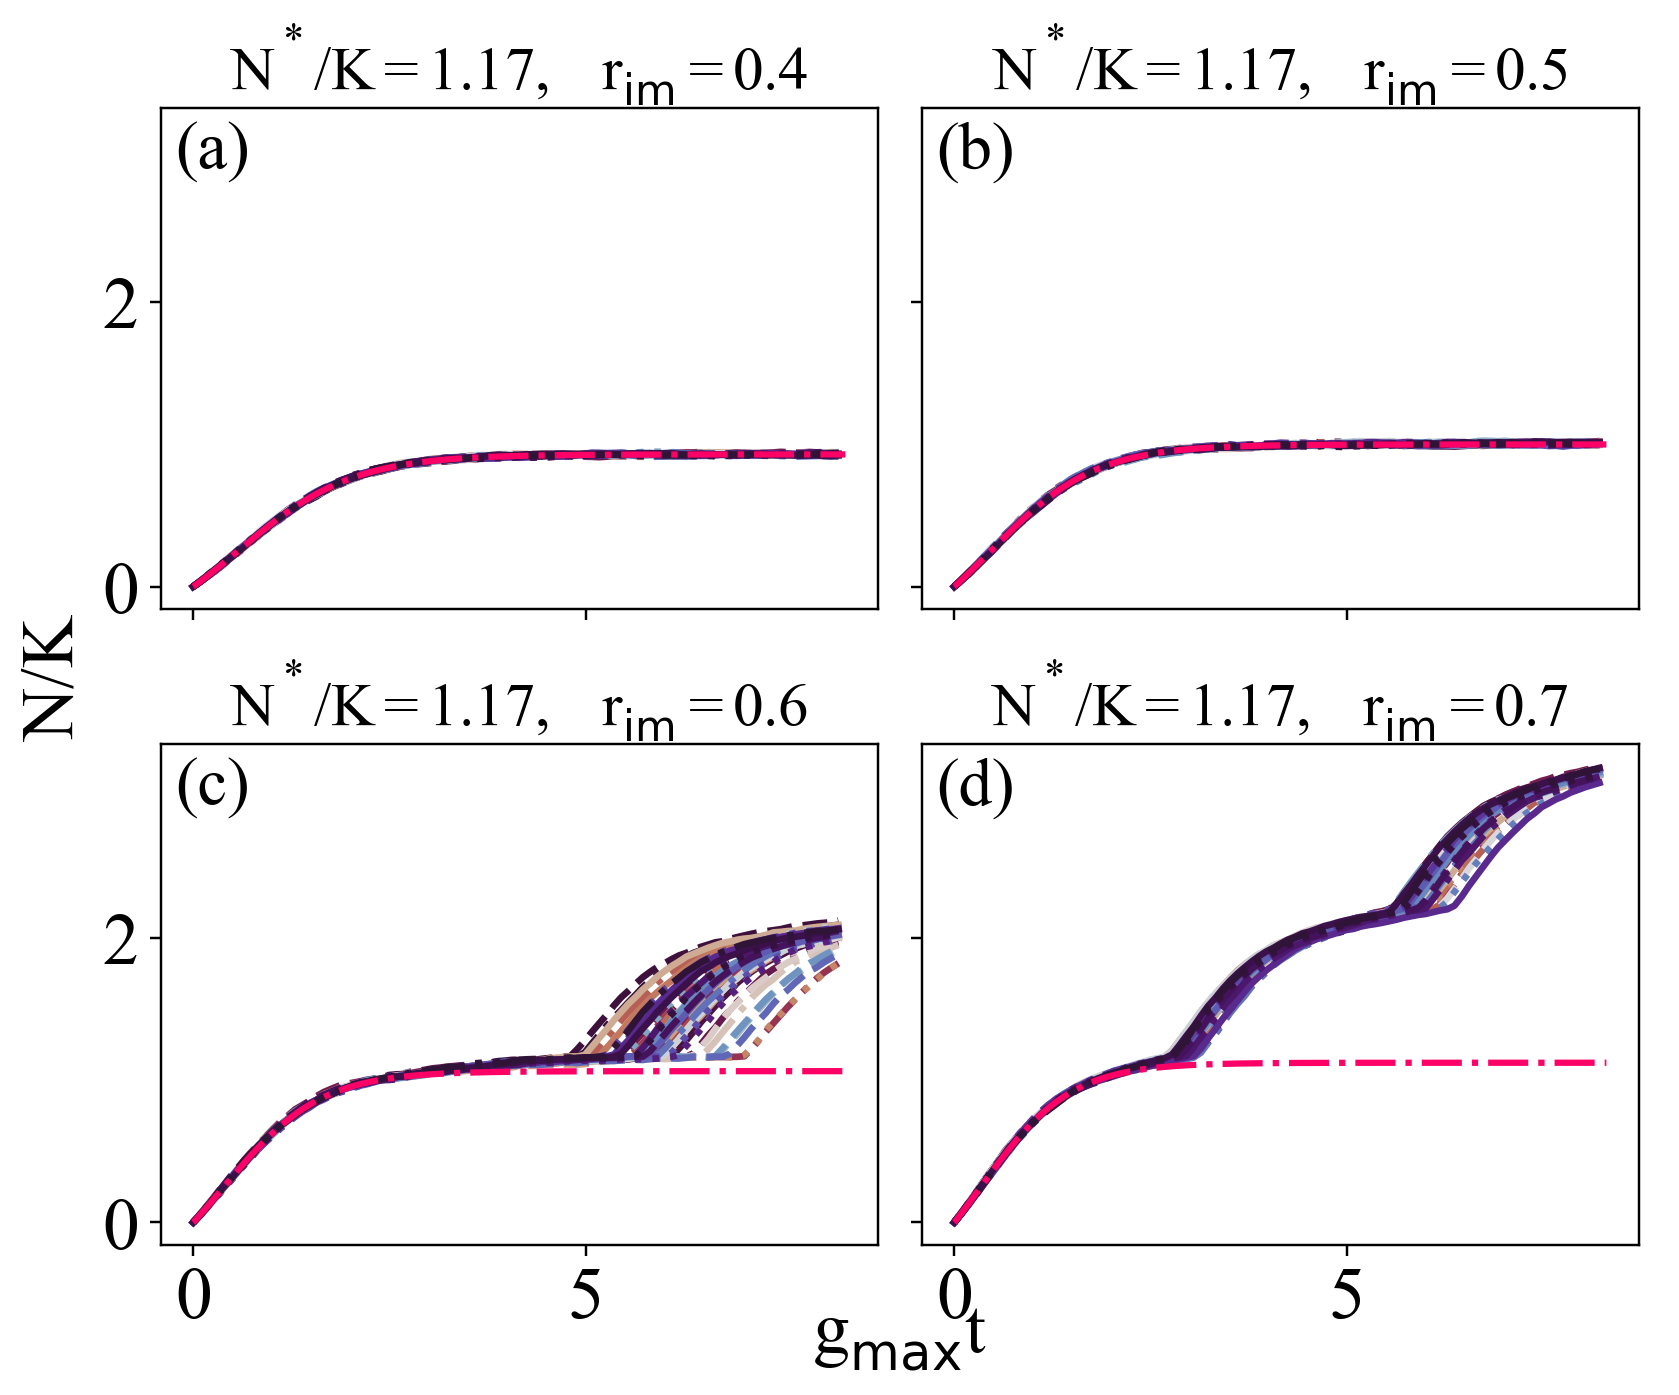

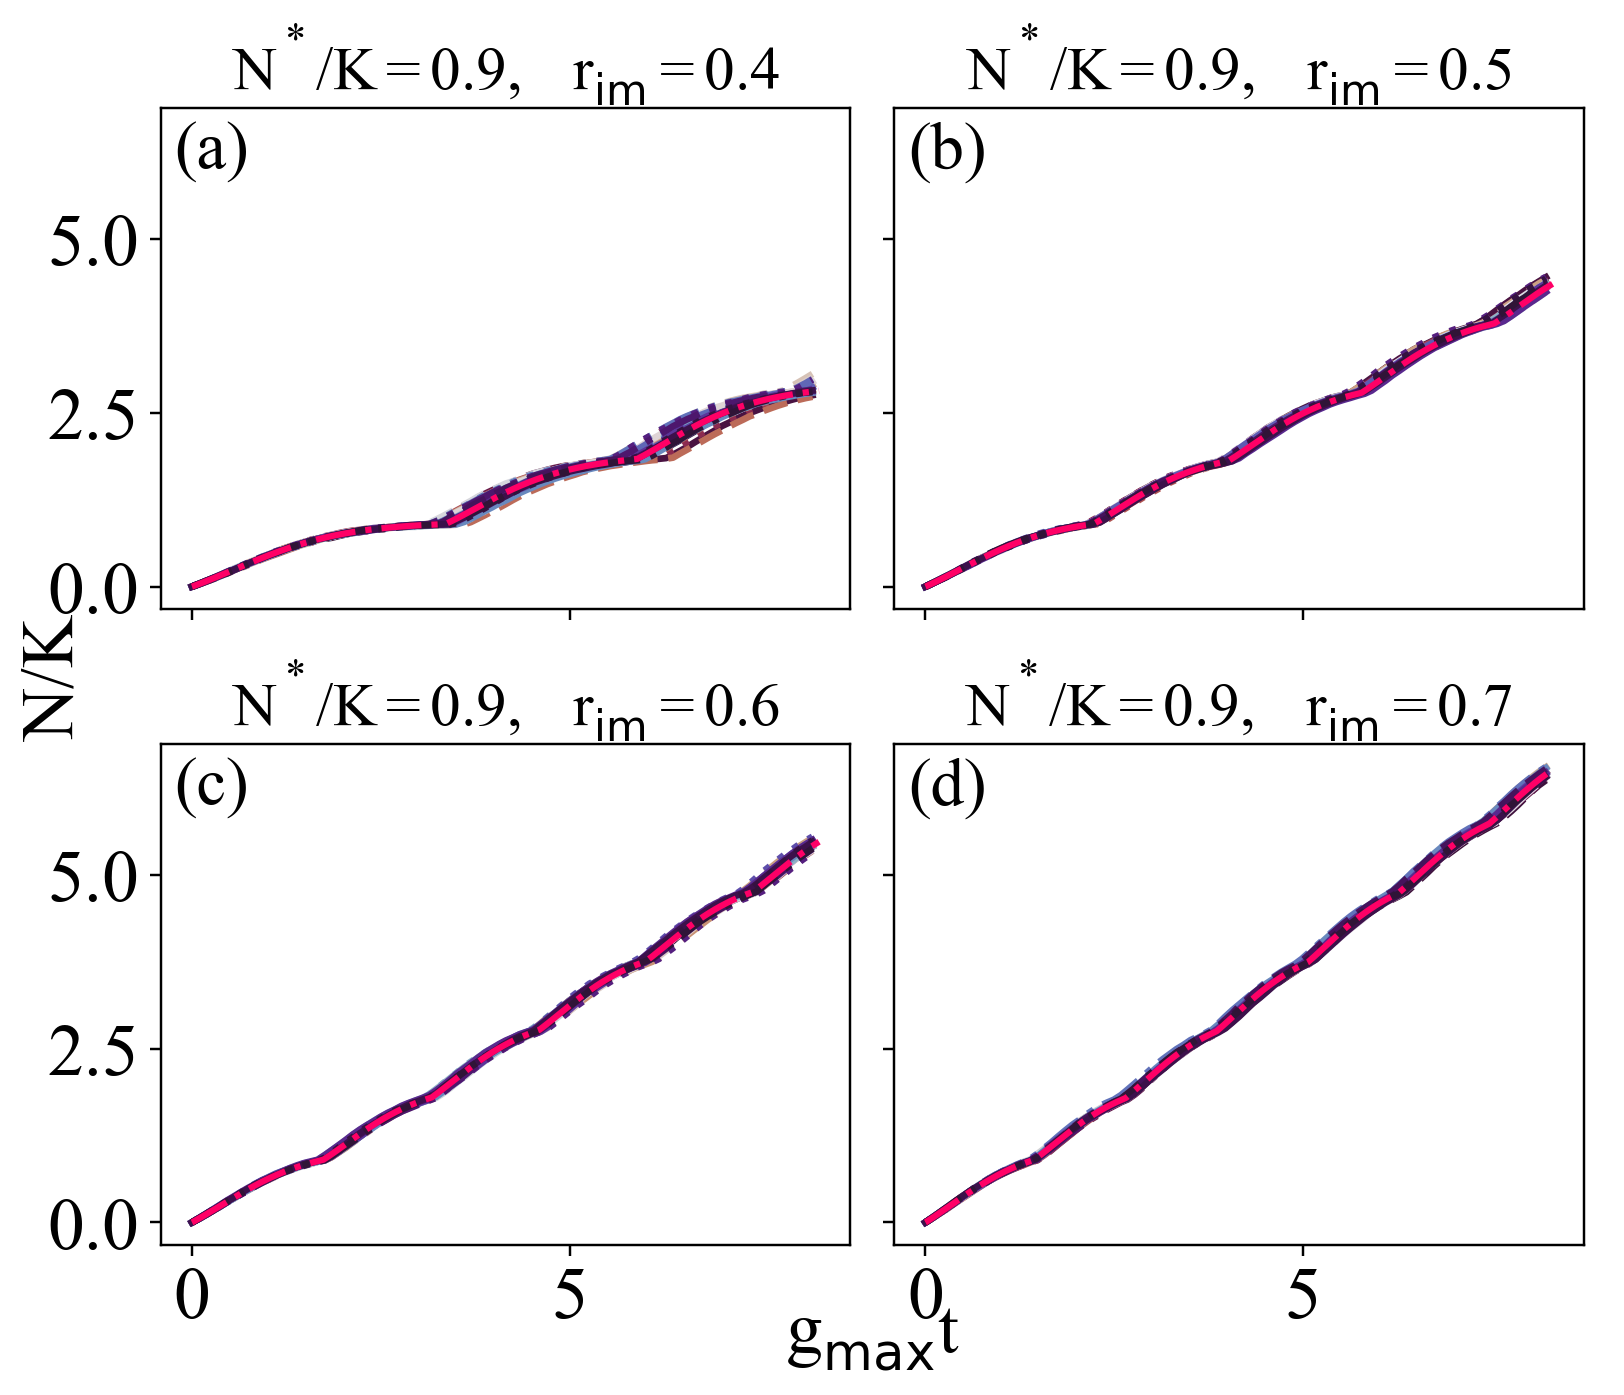

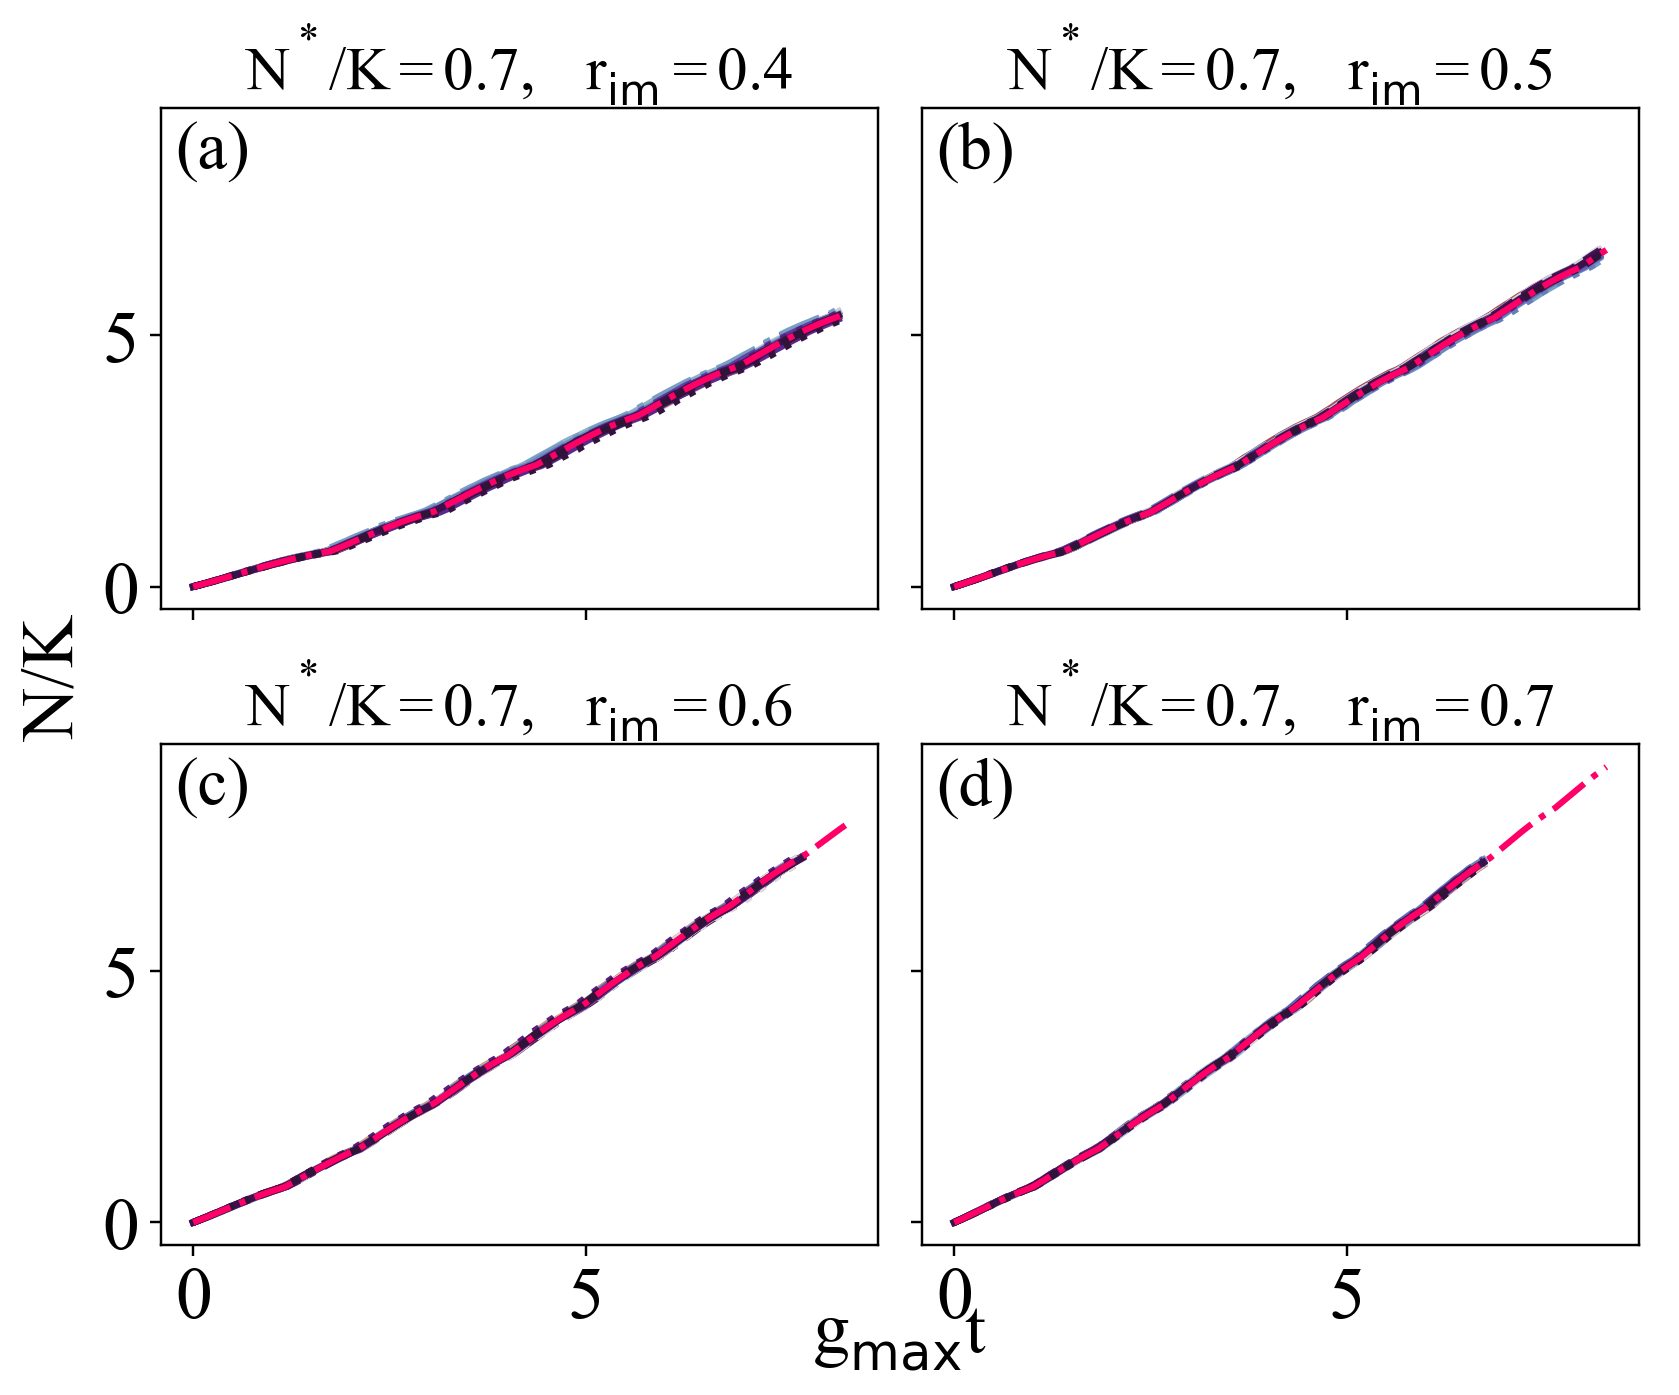

In [6]:
plotQuartetOfPopSizes(fig4c_pops, fig4c_pops_deterministic, r_imm, 1.17, big_K)
plotQuartetOfPopSizes(fig4e_pops, fig4e_pops_deterministic, r_imm, 0.9, big_K)
plotQuartetOfPopSizes(fig4d_pops, fig4d_pops_deterministic, r_imm, 0.7, big_K)

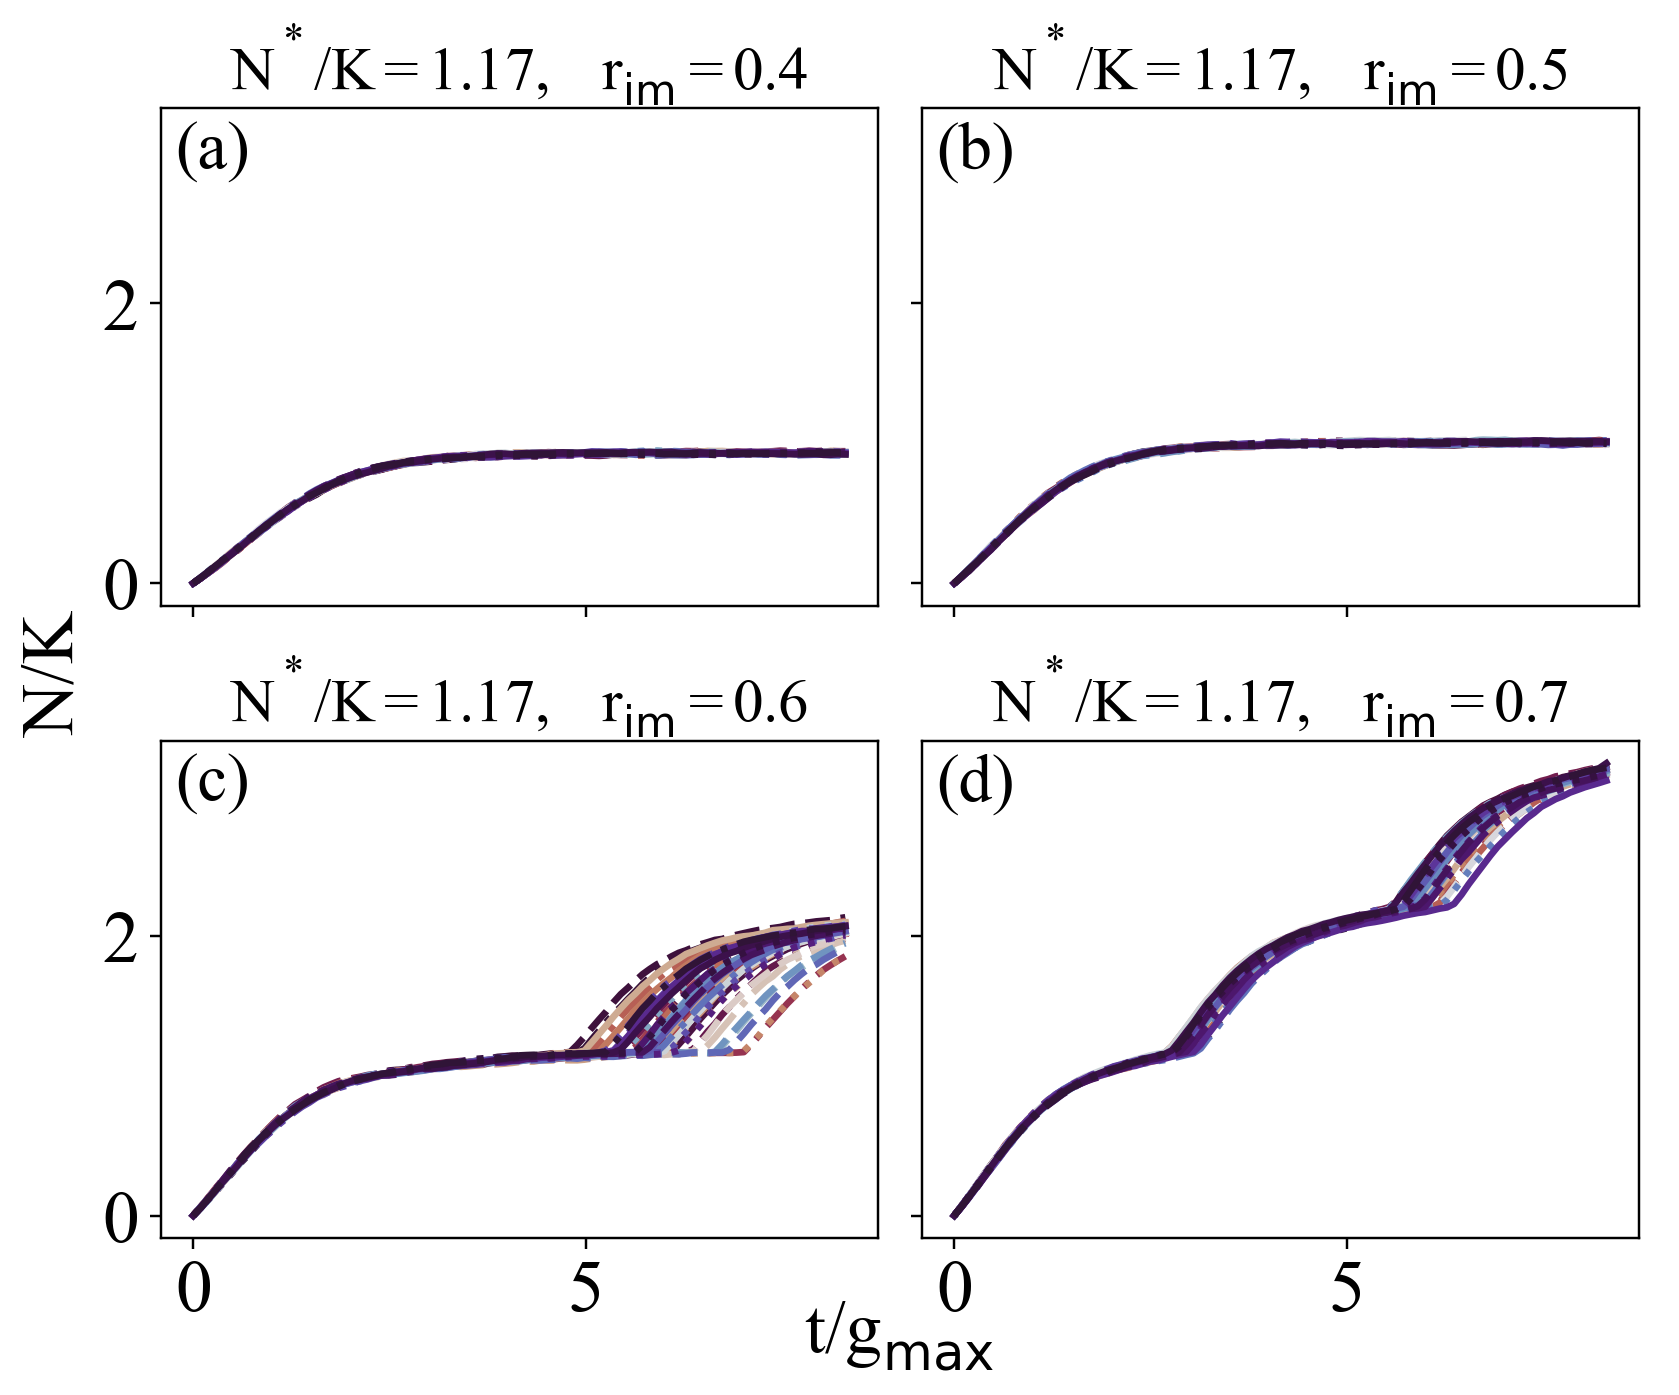

In [7]:
#here we'll plot the stochastic pops over time in a nicer looking format
#this one is for figure 4c
fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
#plt.rcParams['font.sans-serif'] = "Arial"
K_val = 10000
i = 0
letters = ['a', 'b', 'c', 'd']

for ax in axs.flat:

    pop_dataset = fig4c_pops[i]
    #deterministic_pops = deterministicPops_4c_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::-1])
    for p in range(nCols):

        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    #ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')
    
    
    ax.set_title("$N^*/K = 1.17, \;\;$ r$_{\\rm im} = $"+str(r_imm[i]), fontsize = 20)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    i = i+1

fig = plt.gcf()
#fig.suptitle("Title centered above all subplots", fontsize=24)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("t/g$_{\max}$", fontsize=24)
plt.ylabel("N/K", fontsize=24)


plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('allen_plots/N_thresh_1.17.pdf', bbox_inches="tight")
plt.show()

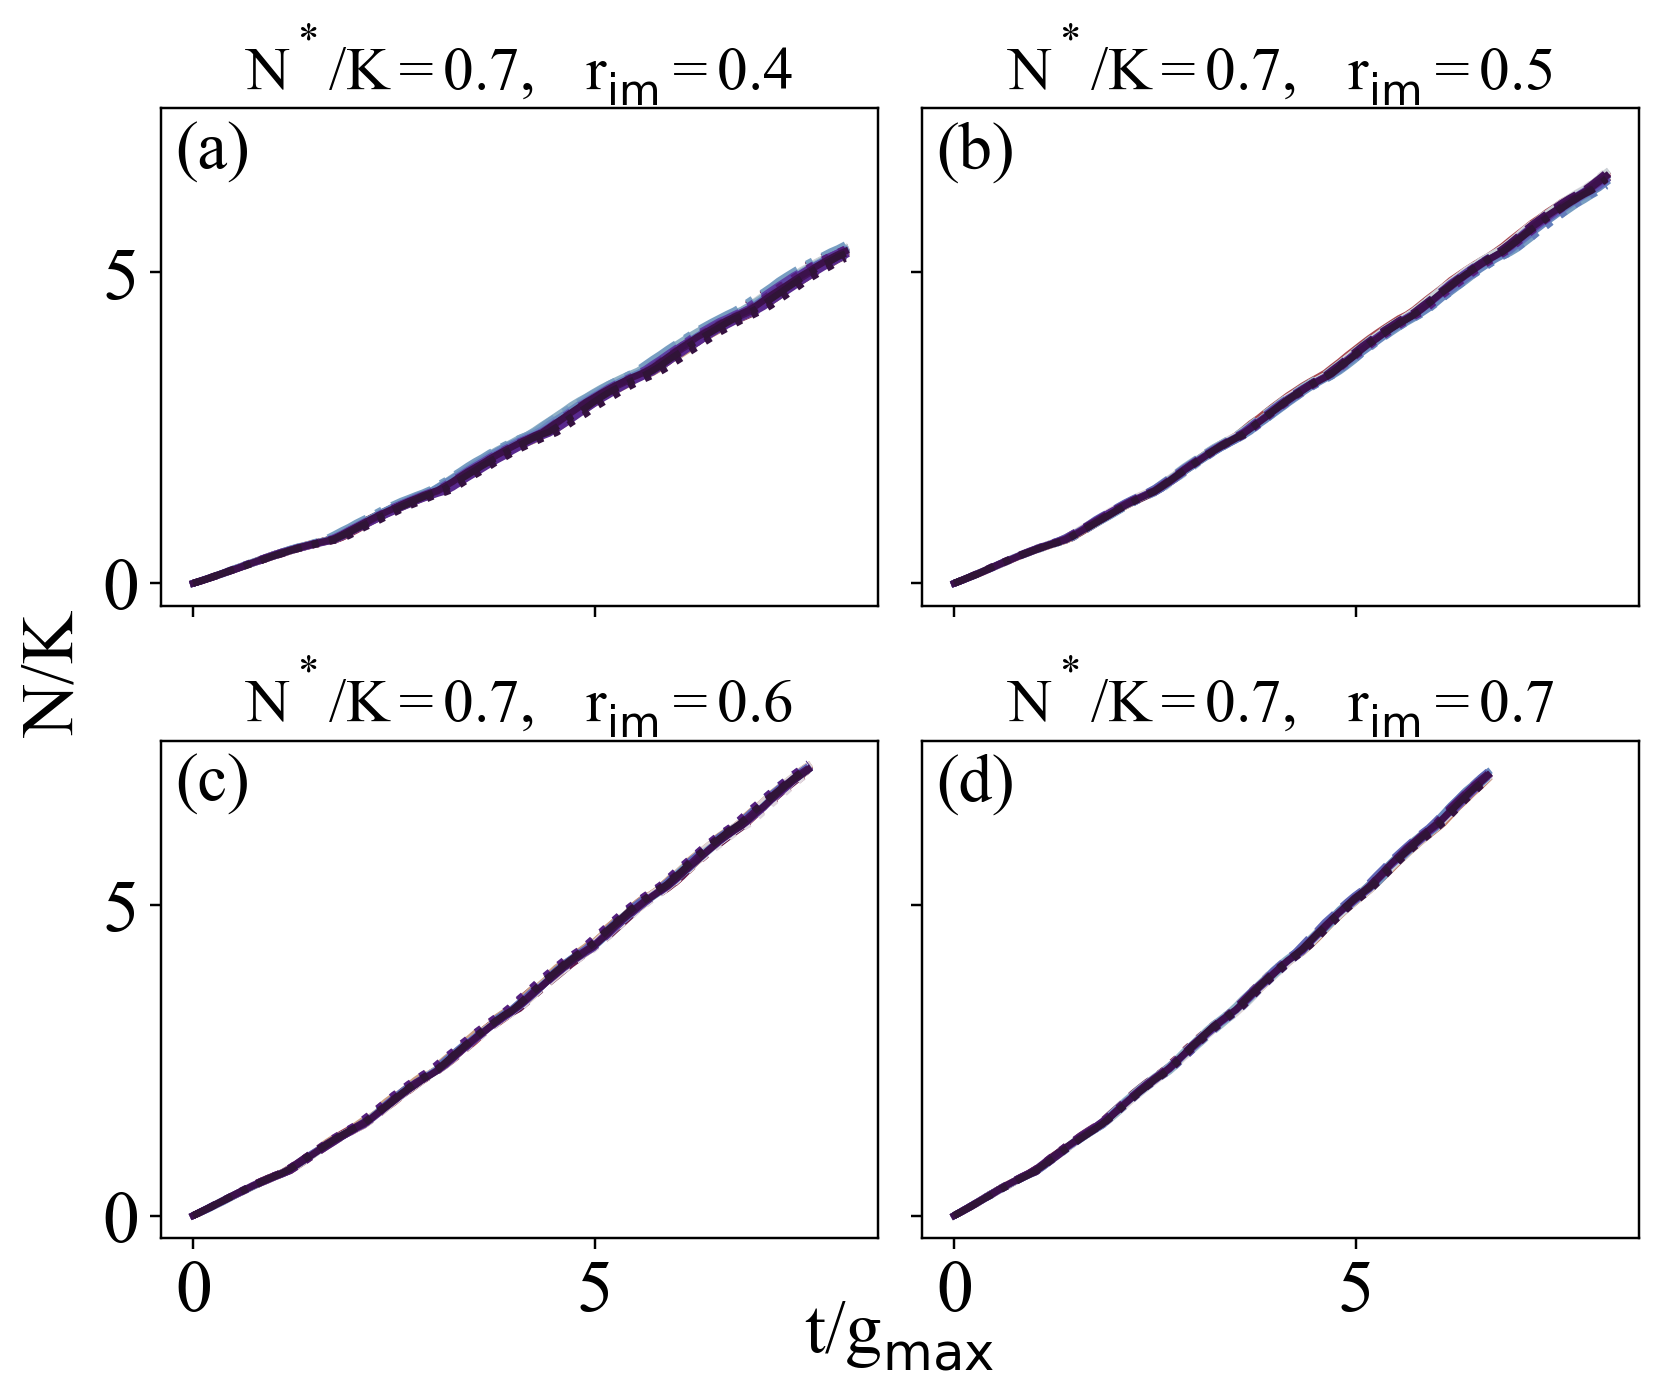

In [8]:
#here we'll plot the stochastic pops over time in a nicer looking format
#this one is for figure 4d
fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
#plt.rcParams['font.sans-serif'] = "Arial"
K_val = 10000
i = 0
letters = ['a', 'b', 'c', 'd']

for ax in axs.flat:

    pop_dataset = fig4d_pops[i]
    #deterministic_pops = deterministicPops_4c_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::-1])
    for p in range(nCols):
        #print((pop_dataset[str(p)][:-2]))
        ax.plot(pop_dataset['t'][:-2]*max_gRate, pd.to_numeric(pop_dataset[str(p)][:-2])/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    #ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')
    
    
    ax.set_title("$N^*/K = 0.7, \;\;$ r$_{\\rm im} = $"+str(r_imm[i]), fontsize = 20)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    i = i+1

fig = plt.gcf()
#fig.suptitle("Title centered above all subplots", fontsize=24)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("t/g$_{\max}$", fontsize=24)
plt.ylabel("N/K", fontsize=24)


plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('allen_plots/N_thresh_0.7.pdf', bbox_inches="tight")
plt.show()

In [9]:
def compareNThresh(r_imms, pops_low_ratio_deterministic,  pops_high_ratio_deterministic, pops_low_ratio_stochastic, pops_high_ratio_stochastic):
    
    fig, axs = plt.subplots(2,2, figsize=(7.6,6), dpi=220, sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.3, wspace=0.1)
    #plt.rcParams['font.sans-serif'] = "Arial"
    K_val = 10000
    i = 0
    letters = ['a', 'b', 'c', 'd']
    N_threshs = [0.7, 1.17]
    pop_datasets_stochastic = [pops_low_ratio_stochastic, pops_high_ratio_stochastic]
    pop_datasets_deterministic = [pops_low_ratio_deterministic, pops_high_ratio_deterministic]
    all_pop_datasets = [pops_low_ratio_stochastic, pops_low_ratio_deterministic, pops_high_ratio_stochastic, pops_high_ratio_deterministic]
    colourmaps = [pl.cm.RdPu, pl.cm.summer_r, pl.cm.Blues]
    colors_deterministic = ["#9900cc", "#29a329", "#3333ff"]
    lines = ["-","--","-.",":"]
    
    for i, (ax, pop_datasets) in enumerate(zip(axs.flatten(), all_pop_datasets)):
        
        # plot all the stochastic datasets
        if not i%2:
            
            for r_imm, pop_dataset, c_map in zip(r_imms, pop_datasets, colourmaps):
                
                
                nCols = len(pop_dataset.columns) - 1
                
                line_colours = c_map(np.linspace(0, 1, nCols))
                linecycler = cycle(lines[::-1])
                
                pop_dataset = pop_dataset.dropna()
                

                for p, line_colour in enumerate(line_colours):

                    pop_dataset_num = pd.to_numeric(pop_dataset[str(p)], errors='coerce')
                    ax.plot(pop_dataset['t']*max_gRate, pop_dataset_num/K_val, lw=2.2, color=line_colour, ls=next(linecycler), label=r_imm)
                    
        # plot the deterministic ones          
        else:
            for pop_dataset, color_det, r_imm in zip(pop_datasets, colors_deterministic, r_imms):
                
                #print(pop_dataset)
                
                ax.plot(pop_dataset['t'], pop_dataset['N'], lw=2.8, color=color_det, label=r_imm)
                
                
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles[::-1], labels[::-1], title=r'$r_{im}/Kg$', fontsize=10)
    
    

#     for ax in axs.flat:
        
#         if not i % 2:
# #             for r_imm, pop_dataset, c_map, deterministic_pops, color_det in zip(r_imms, pop_datasets[i], colourmaps, pop_datasets_deterministic[i], colors_deterministic):
#             for r_imm, pop_dataset, c_map in zip(r_imms, pop_datasets[i//2], colourmaps):

#                 nCols = len(pop_dataset.columns) - 1
#                 colors = c_map(np.linspace(0, 1, nCols))
#                 linecycler = cycle(lines[::-1])

#                 pop_dataset=pop_dataset.dropna()

#                 for p in range(nCols):
                    
#                     pop_dataset_num = pd.to_numeric(pop_dataset[str(p)], errors='coerce')
#                     ax.plot(pop_dataset['t']*max_gRate, pop_dataset_num/K_val, lw=2.2, color=colors[p], ls=next(linecycler), label=r_imm)
# #                     ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2., color=color_det)
            
#             #removes the ticks from the plots
#             #ax.set_xticklabels([])
#             #ax.set_yticklabels([])
        
#         else:
#             for deterministic_pops, color_det, r_imm in zip(pop_datasets_deterministic[i//2], colors_deterministic, r_imms):
#                 ax.plot(deterministic_pops['t'], deterministic_pops['N'], lw=2.2, color=color_det, label=r_imm)
                
#             handles, labels = ax.get_legend_handles_labels()
#             ax.legend(handles[::-1], labels[::-1], title=r'$r_{im}/Kg$', fontsize=10)
#             #ax.legend()
        
        # add line for N*
        #print(N_threshs[i//2]*K_val)
        ax.axhline(N_threshs[i//2], lw=2.6, c='r', ls="--", alpha=0.8)
        
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=24)
        ax.set_ylim(0, 3.1)
        ax.set_xlim(0,8.1)
        ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
        ax.set_title("N*/K = "+str(N_threshs[i//2]), fontsize = 20)
        ax.set_xlabel("gt", fontsize=24, labelpad=-5)
        ax.set_ylabel("N$_{tot}$/K", fontsize=24)
        ax.label_outer()
        
        i = i+1


    fig = plt.gcf()
    #fig.suptitle("Title centered above all subplots", fontsize=24)

#     fig.add_subplot(111, frame_on=False)
#     plt.tick_params(labelcolor="none", bottom=False, left=False)
#     plt.xlabel("t/g$_{\max}$", fontsize=24)
#     plt.ylabel("N/K", fontsize=24)

    #plt.tight_layout()
    #fig.subplots_adjust(top=0.9)
    plt.savefig('paper_plots/N_thresh_comparison.pdf', bbox_inches="tight", dpi=330)
    plt.show()
    

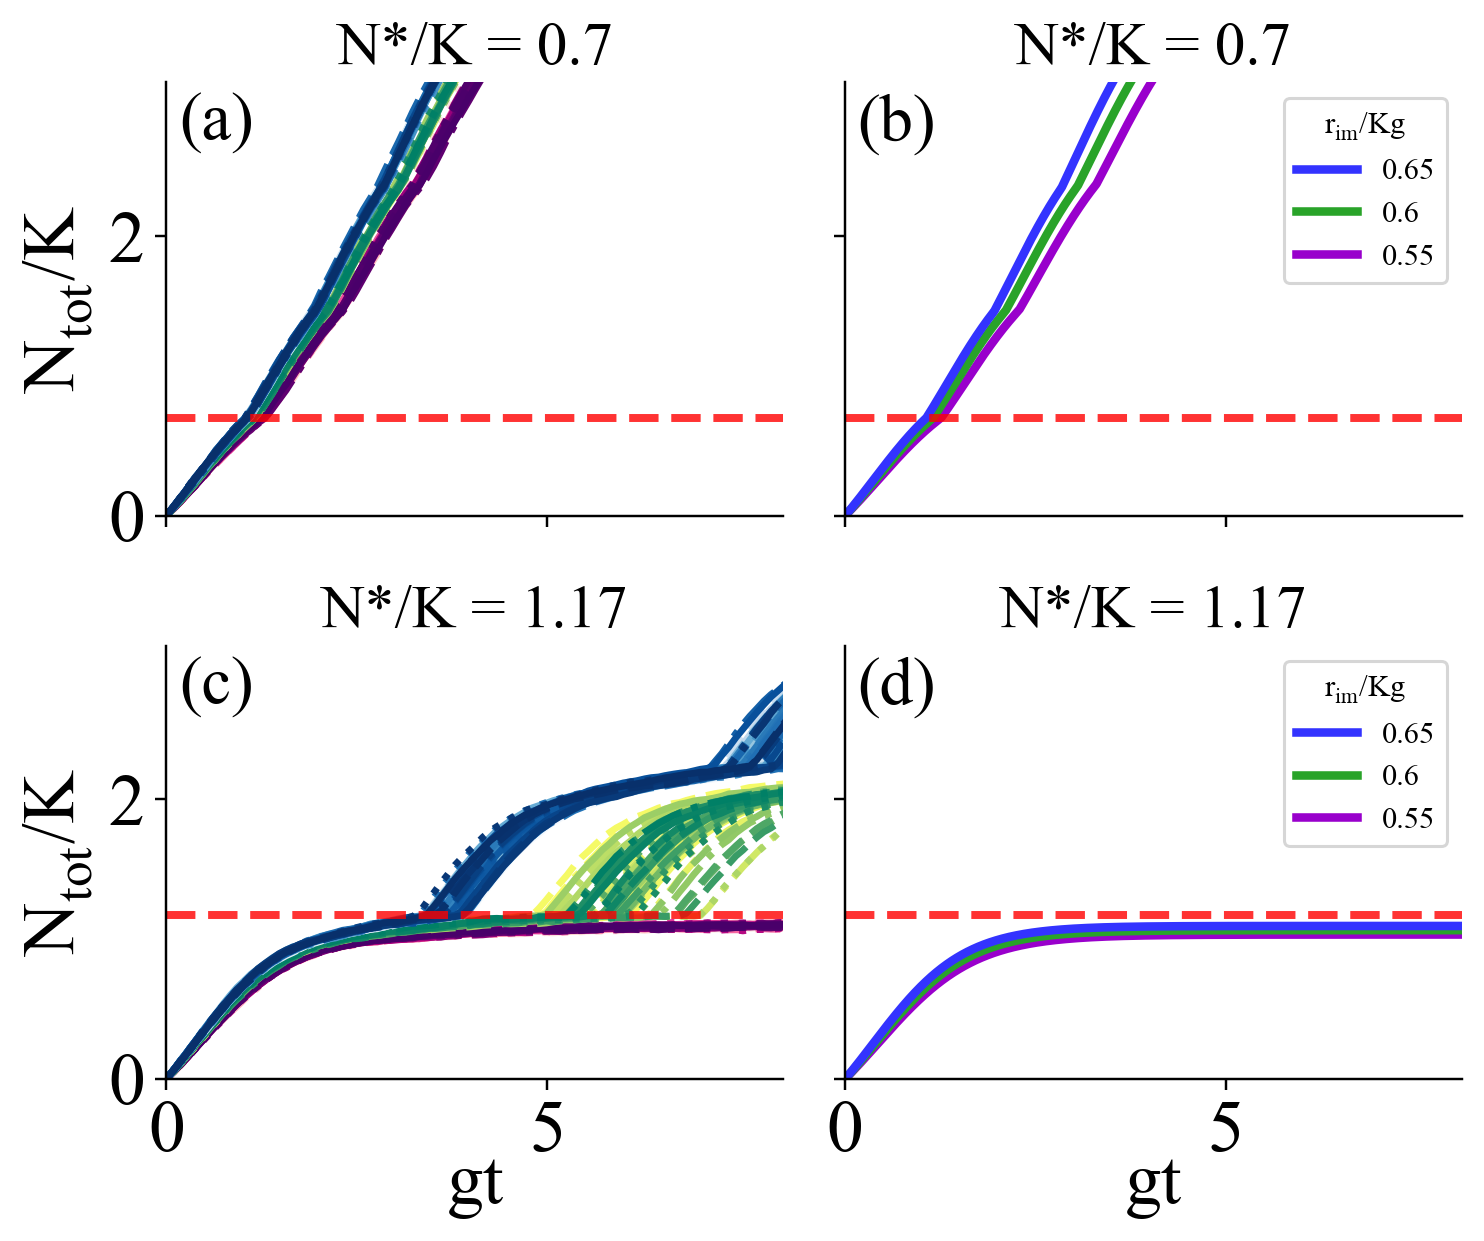

In [10]:
compareNThresh(r_imm_v2, fig4d_pops_deterministic_v2, fig4c_pops_deterministic_v2, fig4d_pops_v2, fig4c_pops_v2)

In [11]:
#compareNThresh(r_imm_v2, fig4d_pops_deterministic_v2, fig4c_pops_deterministic_v2, fig4d_pops_v2, fig4c_pops_small_tau)

In [12]:
fig4c_rImm_0_55['mean_pop'] = fig4c_rImm_0_55.loc[:,[c for c in fig4c_rImm_0_55.columns if c not in ["t", "mean_pop"]]].mean(axis=1)/10000
fig4c_rImm_0_55_small_tau['mean_pop'] = fig4c_rImm_0_55_small_tau.loc[:,[c for c in fig4c_rImm_0_55_small_tau.columns if c not in ["t", "mean_pop"]]].mean(axis=1)/10000
fig4c_rImm_0_55_smaller_tau['mean_pop'] = fig4c_rImm_0_55_smaller_tau.loc[:,[c for c in fig4c_rImm_0_55_smaller_tau.columns if c not in ["t", "mean_pop"]]].mean(axis=1)/10000



In [19]:
varying_tau_final_pop_vals = [fig4c_rImm_0_55['mean_pop'].values[-1], fig4c_rImm_0_55_small_tau['mean_pop'].values[-1], fig4c_rImm_0_55_smaller_tau['mean_pop'].values[-1]]

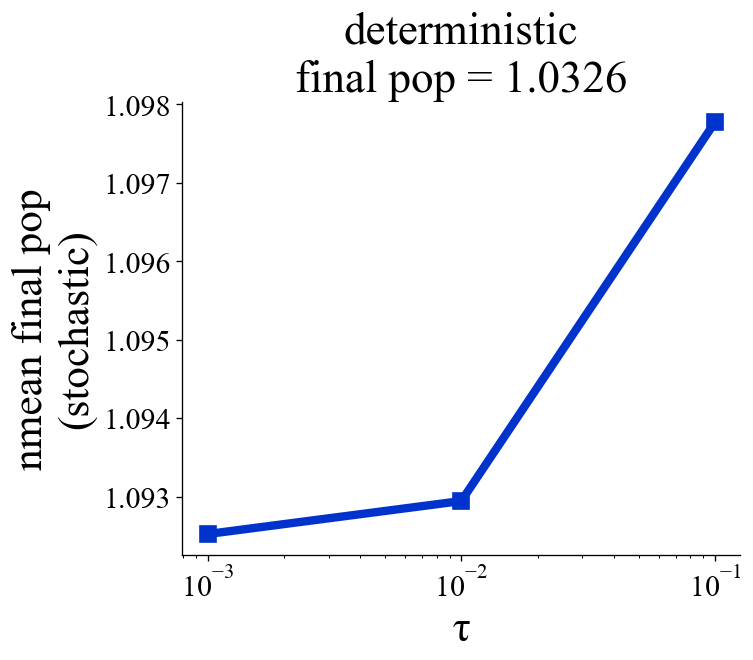

In [14]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=120)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=18)

ax.plot(varying_tau_vals, varying_tau_final_pop_vals, lw=5, marker='s', ms=10, c='#0033cc')

ax.set_xlabel('$\\tau$', fontsize=26)
ax.set_ylabel('nmean final pop\n(stochastic)', fontsize=26)
ax.set_title(f'deterministic\nfinal pop = {fig4c_rImm_0_55_deterministic["N"].values[-1]:.4f}', fontsize=27)
#ax.axhline(fig4c_rImm_0_55_deterministic['N'].values[-1], lw=3)
plt.semilogx()

plt.savefig('paper_plots/reduced_tau_step_avg_pop.pdf', dpi=330, bbox_inches='tight')
plt.show()

In [15]:
fig4c_rImm_0_55_small_tau

,t,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,mean_pop
0,0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000100
1,1.12,536.0,525.0,571.0,540.0,496.0,501.0,549.0,542.0,506.0,...,544.0,562.0,538.0,551.0,523.0,536.0,502.0,503.0,508.0,0.052322
2,2.23,1039.0,1034.0,1146.0,1067.0,1048.0,1027.0,1056.0,1083.0,1059.0,...,1082.0,1148.0,1123.0,1035.0,1077.0,1085.0,1015.0,1113.0,1049.0,0.106336
3,3.34,1599.0,1582.0,1664.0,1607.0,1589.0,1580.0,1607.0,1625.0,1673.0,...,1611.0,1698.0,1712.0,1582.0,1629.0,1633.0,1560.0,1678.0,1611.0,0.161526
4,4.45,2171.0,2107.0,2269.0,2207.0,2112.0,2150.0,2176.0,2224.0,2198.0,...,2164.0,2271.0,2289.0,2115.0,2196.0,2225.0,2116.0,2228.0,2155.0,0.217647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,95.56,11210.0,10796.0,10889.0,10740.0,11054.0,11017.0,10983.0,10848.0,10982.0,...,10971.0,10866.0,11049.0,10970.0,10861.0,10756.0,10993.0,10737.0,11060.0,1.091587
87,96.67,11209.0,10758.0,10904.0,10806.0,11096.0,11039.0,10980.0,10852.0,11006.0,...,10992.0,10848.0,10998.0,10989.0,10813.0,10774.0,10985.0,10744.0,11075.0,1.091895
88,97.78,11195.0,10771.0,10941.0,10790.0,11080.0,11032.0,10954.0,10859.0,10983.0,...,11000.0,10817.0,10976.0,10999.0,10818.0,10789.0,10986.0,10706.0,11076.0,1.091977
89,98.89,11156.0,10823.0,11023.0,10819.0,11072.0,11044.0,10951.0,10890.0,11014.0,...,11022.0,10815.0,11008.0,11001.0,10729.0,10795.0,11008.0,10732.0,11083.0,1.092714


In [16]:
fig4c_rImm_0_55_deterministic

,t,N_edge,N
0,0.000,0.000000,0.000000
1,0.002,0.000550,0.000550
2,0.003,0.001100,0.001100
3,0.004,0.001651,0.001651
4,0.005,0.002202,0.002202
...,...,...,...
8294,8.295,1.032617,1.032617
8295,8.296,1.032617,1.032617
8296,8.297,1.032617,1.032617
8297,8.298,1.032617,1.032617


In [17]:
print(fig4c_rImm_0_55['mean_pop'].values[-10:])
print(fig4c_rImm_0_55_small_tau['mean_pop'].values[-10:])


[1.095449 1.095919 1.0965   1.09695  1.096735 1.096999 1.097006 1.097068
 1.097219 1.097773]
[1.088999 1.08937  1.089884 1.090123 1.090861 1.091587 1.091895 1.091977
 1.092714 1.092943]


In [18]:
print((fig4c_rImm_0_55_smaller_tau['mean_pop'].values[-1] - fig4c_rImm_0_55_deterministic["N"].values[-1])/fig4c_rImm_0_55_deterministic["N"].values[-1]*100, '%')

5.801288882631217 %


In [21]:
fig4c_rImm_0_55

,t,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,mean_pop
0,0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000100
1,1.20,571.0,601.0,593.0,586.0,604.0,589.0,548.0,546.0,614.0,...,606.0,577.0,532.0,529.0,587.0,563.0,559.0,585.0,559.0,0.056185
2,2.29,1137.0,1157.0,1128.0,1141.0,1139.0,1104.0,1068.0,1122.0,1135.0,...,1123.0,1076.0,1033.0,1053.0,1093.0,1091.0,1058.0,1108.0,1068.0,0.109370
3,3.39,1704.0,1700.0,1696.0,1700.0,1665.0,1606.0,1618.0,1635.0,1669.0,...,1683.0,1615.0,1577.0,1600.0,1638.0,1597.0,1577.0,1706.0,1606.0,0.164036
4,4.49,2250.0,2213.0,2252.0,2275.0,2178.0,2146.0,2210.0,2163.0,2221.0,...,2271.0,2185.0,2169.0,2167.0,2223.0,2100.0,2133.0,2299.0,2099.0,0.219810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,95.61,10937.0,10902.0,11196.0,11027.0,10941.0,11136.0,11006.0,10840.0,11003.0,...,10794.0,10854.0,11031.0,10821.0,10932.0,10978.0,11069.0,10907.0,10994.0,1.096999
87,96.71,10995.0,10923.0,11178.0,11046.0,10913.0,11101.0,10919.0,10816.0,11006.0,...,10844.0,10851.0,11008.0,10818.0,10945.0,10976.0,11052.0,10871.0,10997.0,1.097006
88,97.84,11026.0,10945.0,11144.0,11050.0,10866.0,11138.0,10965.0,10769.0,10973.0,...,10867.0,10828.0,11015.0,10836.0,10942.0,10899.0,11080.0,10871.0,11033.0,1.097068
89,98.94,11050.0,10930.0,11139.0,11040.0,10868.0,11118.0,10976.0,10795.0,10972.0,...,10926.0,10838.0,11020.0,10883.0,10958.0,10867.0,11091.0,10848.0,11029.0,1.097219
